In [12]:
import matplotlib.pyplot as plt
from utilities import FileReader
import pandas as pd

### Plot LiDAR

In [13]:
### justin

def plot_lidar_polar(filename):
    df = pd.read_csv(filename)
    
    # obtain data of first line
    ranges = str(df.loc[0, 'ranges'])
    angle_increment = df.loc[0, ' angle_increment']
    ranges = ranges.split("|")

    ranges_plot_points = []
    angles_plot_points = []

    # create polar plot points and skip inf values
    for i, range_val in enumerate(ranges):
        if range_val != 'inf':
            ranges_plot_points.append(float(range_val))
            angles_plot_points.append(angle_increment*i)


    plt.figure()
    ax = plt.subplot(111, polar=True)
    ax.scatter(angles_plot_points, ranges_plot_points, s=2)
    ax.set_title(f"{filename} Plot")
    plt.show()


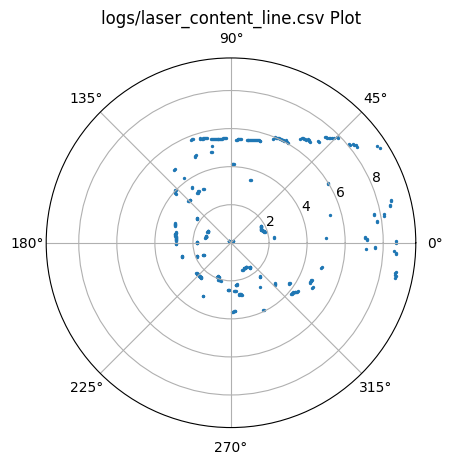

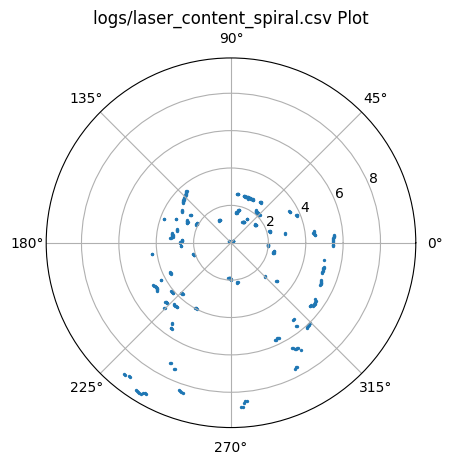

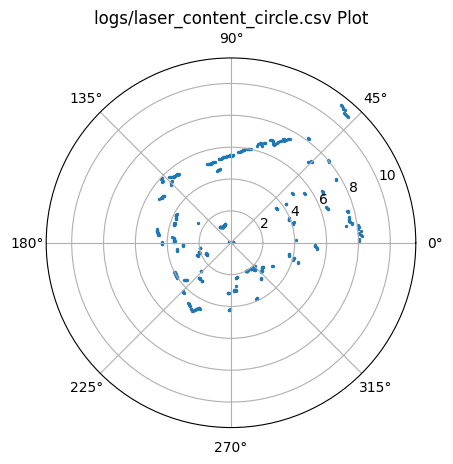

In [14]:
plot_lidar_polar("logs/laser_content_line.csv")
plot_lidar_polar("logs/laser_content_spiral.csv")
plot_lidar_polar("logs/laser_content_circle.csv")